Contributers:

Sam Korman, Ansh Shah, Saman Verma

Abstract:

We start our simulation by modeling an electric dipole with a spring potential. The dipole is separated by a given equilibrium distance. The dipole is then driven by an external sinusoidal electric field, which can be thought of as light with a certain frequency hitting a molecule, and causing oscillations in the electric dipole. The first part of our simulation is to plot the trajectory of these oscillations for various frequencies, and determine which resonant frequency of the driven electric field causes the largest oscillations in the electric dipole. We also show that driving the dipole with a force that is the superposition of two sinusoidal forces results in the same trajectory as that of the addition of the trajectories due to both of those forces separately. For the second part of the simulation, we will calculate the resonant frequency theoretically and use this value to simulate how changes in the electric field propagate away from the dipole at the speed of light. We will use the fact that the speed of light is the fastest speed of information to determine how the electric field should act a certain distance away from the dipole. This simulation will show us how the oscillating charged particles cause electromagnetic waves to propagate away from the dipole, at frequencies determined by the driving force. Ultimately, we will use this fact to show that molecules will scatter light at different frequencies better than others due to their intrinsic characteristics, which explains why different molecules have different emission spectrums of light.


Motivation:
   
We were interested in modeling how a dipole reacts to an external Electric Field. We wanted to measure the trajectory of the dipole and the field at each point along with observing a possible time delay (which we simulate by a smaller speed of light). We found all of that interesting and relevant because the way these dipoles work is very similar to how molecules in the atmosphere interact with the Sun’s rays. By having this model, we can create a better simulation of atmospheric interaction with the Sun.



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as ani
import matplotlib.cm as cm 

# allows animation features within notebook
%matplotlib notebook

In [2]:
# constants of nature

mu0 = 4 * np.pi * 1e-7
e0 = 8.85e-12
c = np.sqrt(1 / (mu0 * e0))
k = 1 / (4 * np.pi * e0)

# Use an artificial speed of light in order to visualize how it changes electric field evolution
c = 0.5
dt = 0.0007

In [3]:
# create timesteps array with a given dt small enough to calculate
# both dipole trajectory and electric field evolution accurately
t0 = 0
t1 = 40
timesteps = np.arange(t0, t1, dt)

In [4]:
# class to store particle data in order to create dipole trajectory
class Particle:
    
    def __init__(self, mass=1, charge=1, pos=np.array([0.0,0.0,0.0]), vel=np.array([0.0,0.0,0.0]), acc=np.array([0.0,0.0,0.0])):
        self.mass = mass
        self.charge = charge
        self.pos = pos
        self.vel = vel
        self.acc = acc

# class that holds all information about a particular dipole, including trajectory given a certain external force
class Dipole:
    
    def __init__(self, timesteps, distance=1, charge=1, mass=1, k=1, external_force_arr=np.zeros(timesteps.size)):
        self.distance = distance
        self.charge = charge
        self.mass = mass
        self.particle1 = Particle(mass=self.mass, charge=self.charge, pos=np.array([-distance/2, 0,0]))
        self.particle2 = Particle(mass=self.mass, charge=-self.charge, pos=np.array([distance/2, 0,0]))
        self.initial_position_1 = np.array([-distance/2, 0,0])
        self.initial_position_2 = np.array([distance/2, 0,0])
        self.dipole_moment = self.charge * np.array([self.distance, 0, 0])
        self.force = 0
        self.timesteps = timesteps
        self.pos1 = np.zeros((self.timesteps.size, 3))
        self.pos2 = np.zeros((self.timesteps.size, 3))
        self.dist_center1 = np.zeros((self.timesteps.size, 3))
        self.dist_center2 = np.zeros((self.timesteps.size, 3))
        
        self.external_force_arr = external_force_arr
        
        self.vel_1 = np.zeros((self.timesteps.size, 3))
        self.accel_1 = np.zeros((self.timesteps.size, 3))
        
        self.vel_2 = np.zeros((self.timesteps.size, 3))
        self.accel_2 = np.zeros((self.timesteps.size, 3))
        
        self.k = k      
        
    def update(self, external_force):
        r = self.particle2.pos - self.particle1.pos
        
        #Driven Oscillation models the movement of the dipole
        
        spring_force = self.k * (np.linalg.norm(r) - self.distance) * (r / np.linalg.norm(r))
        force = spring_force + external_force * self.charge
        
        self.particle1.acc = force / self.particle1.mass
        self.particle2.acc = -force / self.particle2.mass
        self.particle1.vel = self.particle1.vel + self.particle1.acc * dt
        self.particle2.vel = self.particle2.vel + self.particle2.acc * dt
        
        self.particle1.pos += self.particle1.vel * dt
        self.particle2.pos += self.particle2.vel * dt
        
    def calc_trajectory(self):
        
        for i, time in enumerate(self.timesteps):
            self.pos1[i] = self.particle1.pos
            self.pos2[i] = self.particle2.pos
            
            self.vel_1[i] = self.particle1.vel
            self.vel_2[i] = self.particle2.vel

            self.accel_1[i] = self.particle1.acc
            self.accel_2[i] = self.particle2.acc
            
            external_force = np.array([self.external_force_arr[i], 0, 0])
            
            self.update(external_force)
            
        self.dist_center1 = self.pos1 - self.initial_position_1
        self.dist_center2 = self.pos2 - self.initial_position_2
        
        return self.pos1, self.pos2    

In [5]:
def sinusoidal_force(E0,omega,timesteps, phase=0):
    return (E0 * np.sin(omega * timesteps + phase))

we drive the dipole that we set up with a time varying external force. this system is modelled by the following differential equation.
$$ mx'' + kx = Fsin(\omega t)$$

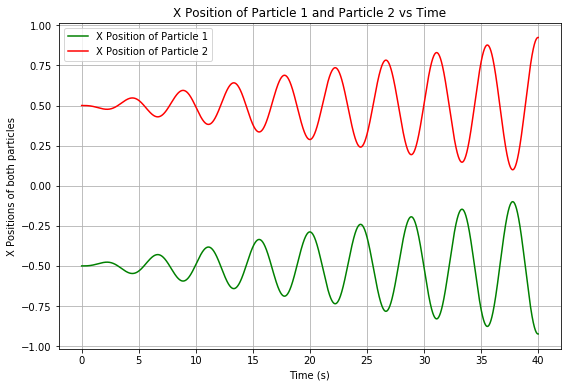

In [6]:
E0 = 0.03 # magnitude of electric field applied to dipole
omega = np.sqrt(2) # theoretically calculated resonant frequency

# external driven sinusoidal force
sinusoidal_force_array = sinusoidal_force(E0,omega,timesteps)

# create dipole and calculate trajectory
dipole = Dipole(timesteps, external_force_arr=sinusoidal_force_array)
dipole.calc_trajectory()

fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole.pos1[:, 0], 'g', label = 'X Position of Particle 1')
ax1.plot(timesteps, dipole.pos2[:, 0], 'r', label = 'X Position of Particle 2')
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Positions of both particles")
ax1.title.set_text("X Position of Particle 1 and Particle 2 vs Time")
ax1.legend()
plt.show()

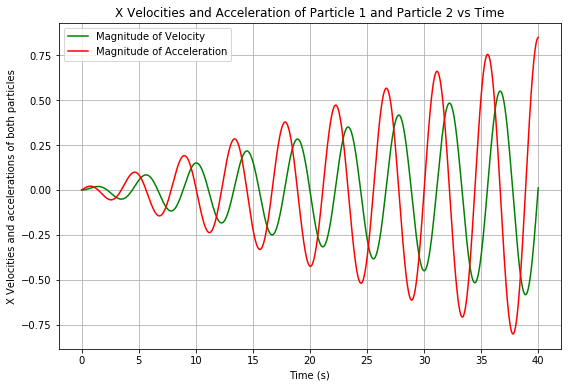

In [7]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole.vel_1[:, 0], 'g', label = 'Magnitude of Velocity')
ax1.plot(timesteps, dipole.accel_1[:, 0], 'r', label = 'Magnitude of Acceleration')
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Velocities and accelerations of both particles")
ax1.title.set_text("X Velocities and Acceleration of Particle 1 and Particle 2 vs Time")
ax1.legend()

plt.show()

Here we evaluate the behaviour of dipole-spring systems under driving forces of different driving frequency and plot the response amplitudes. we notice that the response amplitude peaks at around 1.41 (i.e sqrt(2) ) which is the resonance frequency for this system.

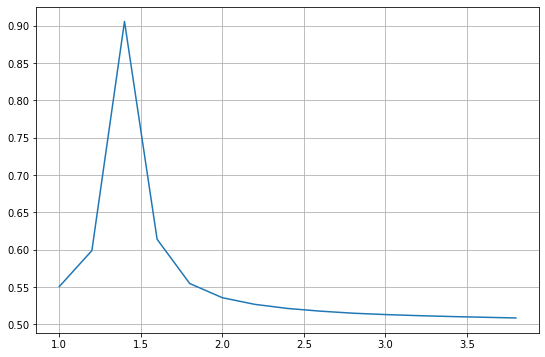

In [8]:
# create range of frequencies for which to calculate trajectories
omega_arr = np.arange(1,4,0.2)

# create array to store amplitude of oscillation for each frequency
oscillation_amplitudes = np.zeros(np.shape(omega_arr))

for i, omega in enumerate(omega_arr):
    # create dipole with external force with given frequency
    external_force_arr = sinusoidal_force(E0,omega,timesteps)
    current_dipole = Dipole(timesteps, external_force_arr=external_force_arr)
    posA,posB = current_dipole.calc_trajectory()    
    
    # determine maximum amplitude for trajectory and store in array
    oscillation_amplitudes[i] = np.amax(posB)
    
fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(omega_arr,oscillation_amplitudes)
ax1.grid()

Now we start investigating the behaviour of the electric field of the dipole as it oscillates.

In [9]:
def calc_electric_field(dipole, point):
    ''' function to calculate electric field for a point from initial position of the dipole'''
    
    #OpenCourseWare
    
    dif1 = point - dipole.initial_position_1
    dif2 = point - dipole.initial_position_2
    
    r_mag1 = np.linalg.norm(dif1)
    r_mag2 = np.linalg.norm(dif2)
    
    Ex = dipole.charge * (dif1[0]*r_mag1**-3 - dif2[0]*r_mag2**-3)
    Ey = dipole.charge * (dif1[1]*r_mag1**-3 - dif2[1]*r_mag2**-3)
    Ez = dipole.charge * (dif1[2]*r_mag1**-3 - dif2[2]*r_mag2**-3)
    
    return np.array([Ex, Ey, Ez])

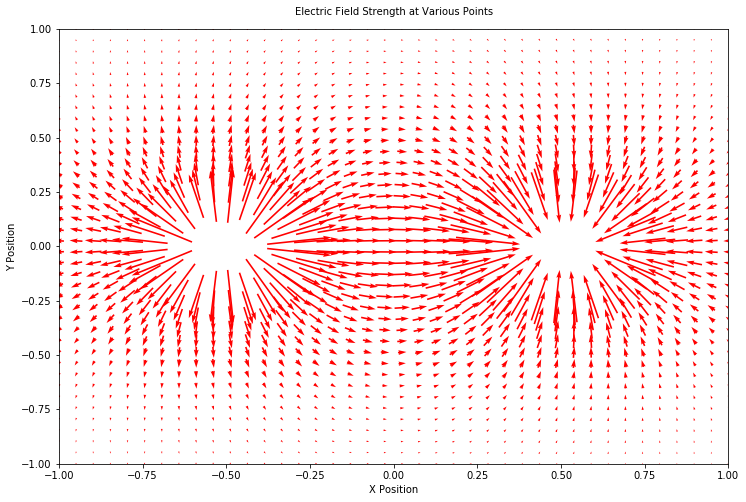

In [10]:
# This cell is to plot electric field around dipole at initial conditions
fig = plt.figure(figsize=(12,8))
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))

# create meshgrid of points
Nsteps = 40
grid_min = -1
grid_max = 1

x, y = np.meshgrid(np.linspace(grid_min, grid_max, Nsteps),
                      np.linspace(grid_min, grid_max, Nsteps))
E = calc_electric_field(dipole, [x, y, 0])

# find maximum magnitude for mask
magEfield = np.sqrt(E[0]**2 + E[1]**2 + E[2]**2)
maxMagEfield = np.max(magEfield)

mask_efield = np.where(magEfield < maxMagEfield * 0.02)

ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='top', ha = 'center')
ttl.set_text("Electric Field Strength at Various Points")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

Qplot = ax.quiver(x[mask_efield], y[mask_efield], 
                   E[0][mask_efield], E[1][mask_efield], 
                   units='inches',pivot='mid',color='r', scale=25)

when the dipole changes it's position, the information that it's position has changed propogates at the speed of light. if the dipole starts moving at t = 0. A point t light seconds away will have the same electric field as when the dipole was stationary until the information reaches it. the information would take time r/c to reach it where r is the seperation between the point and dipole. thus we can set up a new time for each point since as far as that point is concerned the dipole is stil in its former state. formally we write. 
$$t' = t - r/c$$ where t' is the time of the dipole

In [11]:
# binary search algorithm used for electric field calculation. Time complexity O(log(n)).
def binary_search(array, value):
    '''binary search algorithm for value in an array'''
    low = 0
    high = array.size - 1
    midpoint = int((high - low) / 2)
    n = 0
    
    if value > array[high]:
        return -1
    
    while(low <= high and n < array.size):
        n+=1
        midpoint = int((low + high) / 2)
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            high = midpoint - 1
        elif array[midpoint] < value:
            low = midpoint + 1
    return midpoint


In [12]:
def relax(arr, relax_mask):
    '''relaxation method used to fill in gaps in arrays'''
    keep_same = arr[relax_mask]
    first = arr[0]
    last = arr[-1]    
    
    arr = (np.roll(arr,-1, axis=0) + np.roll(arr,1,axis=0))/2
    
    arr[relax_mask] = keep_same
    arr[0] = first
    arr[-1] = last
    return arr

In [ ]:
# class to store electric field evolution of a single point in space over time
class point_in_space():
    
    def __init__(self, x, y, z, timesteps, relax_iterations=1000):
        self.xyz = np.array([x, y, z]) # position of point in space
        self.electric_field = np.zeros((timesteps.size, 3)) # combined electric fields
        self.electric_field_1 = np.zeros((timesteps.size, 3)) # electric field contribution from particle 1
        self.electric_field_2 = np.zeros((timesteps.size, 3)) # electric field contribution from particle 2
        self.first_index = 0 # first index that electric field from both particles reaches point in space
        self.first_index1 = 0 # first index that electric field from particle 1 reaches point in space
        self.first_index2 = 0 # first index that electric field from particle 2 reaches point in space
        self.iteration_flag = False
        self.relax_iterations = relax_iterations # iterations for relaxation method
        self.timesteps = timesteps
        
        self.indices = np.zeros(timesteps.shape)
        
    def reset_electric_field(self):
        self.electric_field_1 = np.zeros((timesteps.size, 3))
        self.electric_field_2 = np.zeros((timesteps.size, 3))
        self.electric_field = np.zeros((timesteps.size, 3))
        
    def populate_electric_field_array(self, pos1, pos2, time, i):
        '''function to populate electric field array at a certain point in time'''
        r1 = self.xyz - pos1 # distance from particle 1
        r2 = self.xyz - pos2 # distance from particle 2
        
        #Lewin 
        time1 = time + np.linalg.norm(r1) / c # time when particle 1 information will actually reach point in space
        time2 = time + np.linalg.norm(r2) / c # time when particle 2 information will actually reach point in space

        # indices of time to reach point in space
        index1 = binary_search(self.timesteps, time1) 
        index2 = binary_search(self.timesteps, time2)

        self.indices[i] = index1

        # calculation of the elctric field at this point in time
        r_mag1 = np.linalg.norm(r1)
        r_mag2 = np.linalg.norm(r2)

        Ex1 = dipole.charge * (r1[0]*r_mag1**-3)
        Ey1 = dipole.charge * (r1[1]*r_mag1**-3)
        Ez1 = dipole.charge * (r1[2]*r_mag1**-3)

        Ex2 = -dipole.charge * (r2[0]*r_mag2**-3)
        Ey2 = -dipole.charge * (r2[1]*r_mag2**-3)
        Ez2 = -dipole.charge * (r2[2]*r_mag2**-3)

        # end calculation if we have reached the end of our timesteps array
        if index1 != -1:
            self.electric_field_1[index1] = np.array([Ex1, Ey1, Ez1])
        if index2 != -1:
            self.electric_field_2[index2] = np.array([Ex2, Ey2, Ez2])

        if index1 == -1 and index2 == -1:
            self.iteration_flag = True

        # store first indices when dipole movement will reach point in space
        if(i == 0):
            self.first_index1 = index1
            self.first_index2 = index2
            self.electric_field_1[:index1] = np.array([Ex1, Ey1, Ez1])
            self.electric_field_2[:index2] = np.array([Ex2, Ey2, Ez2])
            
    def calculate_electric_field(self, dipole):
        '''function to completely calculate electric field evolution over time'''
        
        #OpenCourseWare
        self.iteration_flag = False
        self.reset_electric_field()
        pos1 = dipole.pos1
        pos2 = dipole.pos2
        for i, t in enumerate(self.timesteps):
            # populate arrays for certain point in time
            self.populate_electric_field_array(pos1[i], pos2[i], t, i)
            if self.iteration_flag:
                break # end computation if reached end of timesteps array
        
        self.first_index = np.max(self.first_index1 + self.first_index2)
        
        # fill in gaps in array because not all values in timesteps will be filled at this point
        self.relax_electric_fields()
        
        # add contributions of electric field from both particles
        self.electric_field = self.electric_field_1 + self.electric_field_2
        
    def relax_electric_fields(self):
        '''iterative relaxation method used in order to fill gaps in electric field array'''
        
        # want to leave already calculated points the same
        relax_mask_1 = np.where(np.abs(self.electric_field_1) != 0)
        relax_mask_2 = np.where(np.abs(self.electric_field_2) != 0)

        for i in range(self.relax_iterations): # fill in gaps between calculated points for both arrays
            self.electric_field_1 = relax(self.electric_field_1, relax_mask_1)
            self.electric_field_2 = relax(self.electric_field_2, relax_mask_2)

we implement this in code through the class point_in_space. this class is set up such that each point_in_space has an electric field array assosciated with it which stores the values of the electric field vector at each different point in time. each position of the dipole correlates to certain electric field values at a given point. the change in the electric field values of point_in_charge's electric field array (under work)

In [14]:
# example point in space
p1 = point_in_space(-0.750, 0.5, 0, timesteps)
p1.calculate_electric_field(dipole)

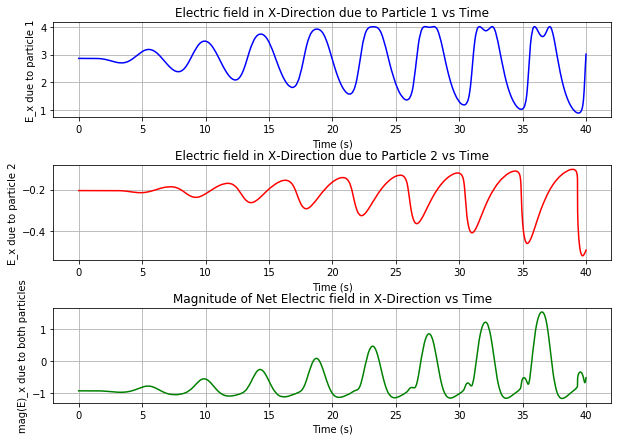

In [15]:
# This cell is for plotting different components of the calculated electric field for p1

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,7))
ax1.plot(timesteps[:], p1.electric_field_1[:, 1], 'b-')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E_x due to particle 1")

ax2.plot(timesteps[:], p1.electric_field_2[:, 1], 'r-')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("E_x due to particle 2")


ax3.plot(timesteps, p1.electric_field[:, 0], 'g-')
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("mag(E)_x due to both particles")

ax1.grid()
ax2.grid()
ax3.grid()

ax1.title.set_text("Electric field in X-Direction due to Particle 1 vs Time")
ax2.title.set_text("Electric field in X-Direction due to Particle 2 vs Time")
ax3.title.set_text("Magnitude of Net Electric field in X-Direction vs Time")

fig.subplots_adjust(hspace=.5)

In [16]:
def calculate_vector_evolution_array(x, y, dipole):
    ''' function that calculates vector evolution for a meshgrid of points '''
    vector_evolution = np.empty(x.size, dtype=point_in_space) # create array of points
    num_points = x.size
    for i in range(num_points):
        point = point_in_space(x[i], y[i], 0, timesteps)
        point.calculate_electric_field(dipole)
        vector_evolution[i] = point # populate array
        
        # log calculation number becuase these calculations can take a very long time
        print("calculated electric field evolution ", (i + 1), "out of ", num_points)
    
    return vector_evolution

In [17]:
def get_2D_electric_field(p_array, unit_vectors=True):
    '''function to calculate vectors for plotting from array of points'''
    x = np.zeros(p_array.size)
    y = np.zeros(p_array.size)
    Ex = np.zeros((p_array.size, timesteps.size))
    Ey = np.zeros((p_array.size, timesteps.size))
    for i, point in enumerate(p_array):
        x[i] = point.xyz[0]
        y[i] = point.xyz[1]
        Ex_current = point.electric_field[:, 0]
        Ey_current = point.electric_field[:, 1]
        
        if unit_vectors: # calculate unit vectors
            mag_vec = np.sqrt(Ex_current**2 + Ey_current**2) # magnitude of individual vectors
            Ex[i] = Ex_current / mag_vec # divide by magnitude
            Ey[i] = Ey_current / mag_vec   
        else:
            Ex[i] = Ex_current
            Ey[i] = Ey_current
        
    return x, y, Ex, Ey


In [18]:
# WARNING: this cell takes a long time to process, and is not entirely necessary if you watch the embedded videos

# create a meshgrid of points around dipole in which to calculate electric field evolution
Nsteps = 4
grid_min = -1
grid_max = 1

x_grid, y_grid = np.meshgrid(np.linspace(grid_min, grid_max, Nsteps),
                      np.linspace(grid_min, grid_max, Nsteps))

x_test = np.ravel(x_grid)
y_test = np.ravel(y_grid)

# store array of calculated points
p_array_meshgrid = calculate_vector_evolution_array(x_test, y_test, dipole)

calculated electric field evolution  1 out of  16
calculated electric field evolution  2 out of  16
calculated electric field evolution  3 out of  16
calculated electric field evolution  4 out of  16
calculated electric field evolution  5 out of  16
calculated electric field evolution  6 out of  16
calculated electric field evolution  7 out of  16
calculated electric field evolution  8 out of  16
calculated electric field evolution  9 out of  16
calculated electric field evolution  10 out of  16
calculated electric field evolution  11 out of  16
calculated electric field evolution  12 out of  16
calculated electric field evolution  13 out of  16
calculated electric field evolution  14 out of  16
calculated electric field evolution  15 out of  16
calculated electric field evolution  16 out of  16


<IPython.core.display.Javascript object>


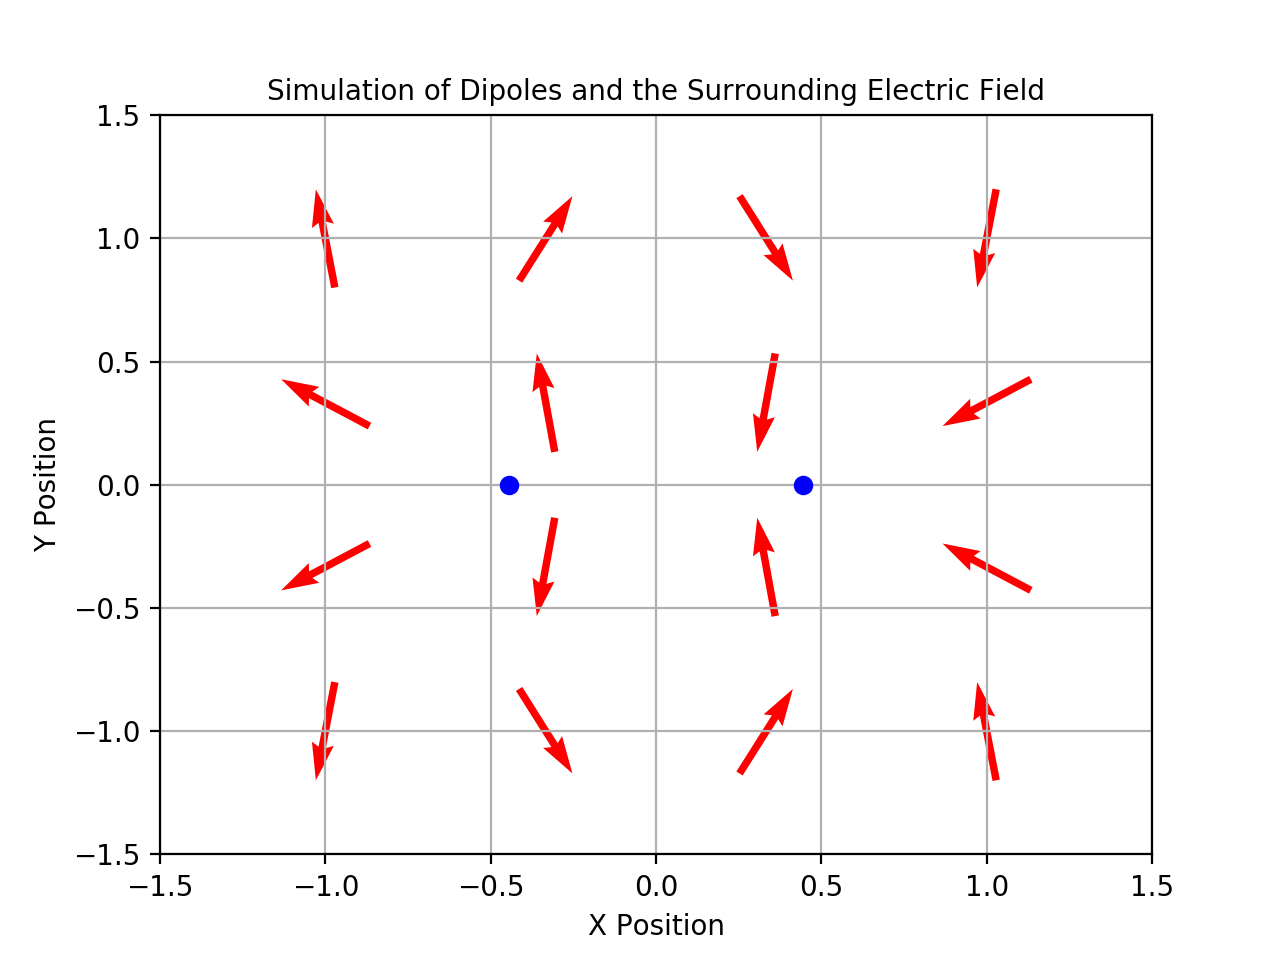

In [19]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
initial_index = 0 # index to start the simulation at
speed_factor = 10 # speed of simulation
scale_factor = 1 # scale to change size of vectors
frame_num = int(timesteps.size / speed_factor) # number of frames before simulation repeats

p_array = p_array_meshgrid # use meshgrid from before, although can be any array of points
x, y, Ex, Ey = get_2D_electric_field(p_array, unit_vectors=True) # calculate vectors for plotting
    
plt.grid()

# plot initial conditions
E_changing_plot = ax.quiver(x, y, 
                   Ex[:, 0], Ey[:, 0], 
                   units='inches',pivot='mid',color='r', scale=2)

pos1 = dipole.pos1
pos2 = dipole.pos2

# plot initial positions for dipole trajectory
dipole_plot, = ax.plot([pos1[0][0], pos2[0][0]], [pos1[0][1], pos2[0][1]], 'bo')

ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='top', ha = 'center')
    
def plot_point_in_space(i):
    
    # calculate x and y vector components for each point in space
    x_component = Ex[:, i * speed_factor] * scale_factor
    y_component = Ey[:, i * speed_factor] * scale_factor
    
    # update electric field plot
    E_changing_plot.set_UVC(x_component, y_component)
    
    dipole_x = [pos1[i * speed_factor, 0], pos2[i * speed_factor, 0]]
    
    dipole_plot.set_xdata(dipole_x) # dipole only oscillates in x-direction
    
    ttl.set_text("Simulation of Dipoles and the Surrounding Electric Field")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    
    return dipole_plot, E_changing_plot

# animation object
anim = ani.FuncAnimation(fig, plot_point_in_space,
                               frames=frame_num, interval=1, blit=False)
plt.show()

In [20]:
# This cell is for creating a piecewise force applied to the dipole without
# any internal spring potential in the dipole
E0_piecewise = 0.02 # magnitude of force

def piecewise_force(timesteps,E0):
    force = np.zeros(np.shape(timesteps))
    for i in range(np.size(timesteps)):
        if i < np.size(timesteps)/4: # if we're in first quadrant of time, apply force
            force[i] = E0
        else:                        # otherwise, apply 0 force
            force[i] = 0
    return force
 

# create dipole for piecewise force
piecewise_force = piecewise_force(timesteps,E0_piecewise)
dipole_piecewise = Dipole(timesteps = timesteps, distance =1,k = 0, external_force_arr=piecewise_force)
posa,posb = dipole_piecewise.calc_trajectory()

# calculate electric field evolution at a point in space
new_point = point_in_space(0.5, 5, 0, timesteps)
new_point.calculate_electric_field(dipole_piecewise)

<IPython.core.display.Javascript object>


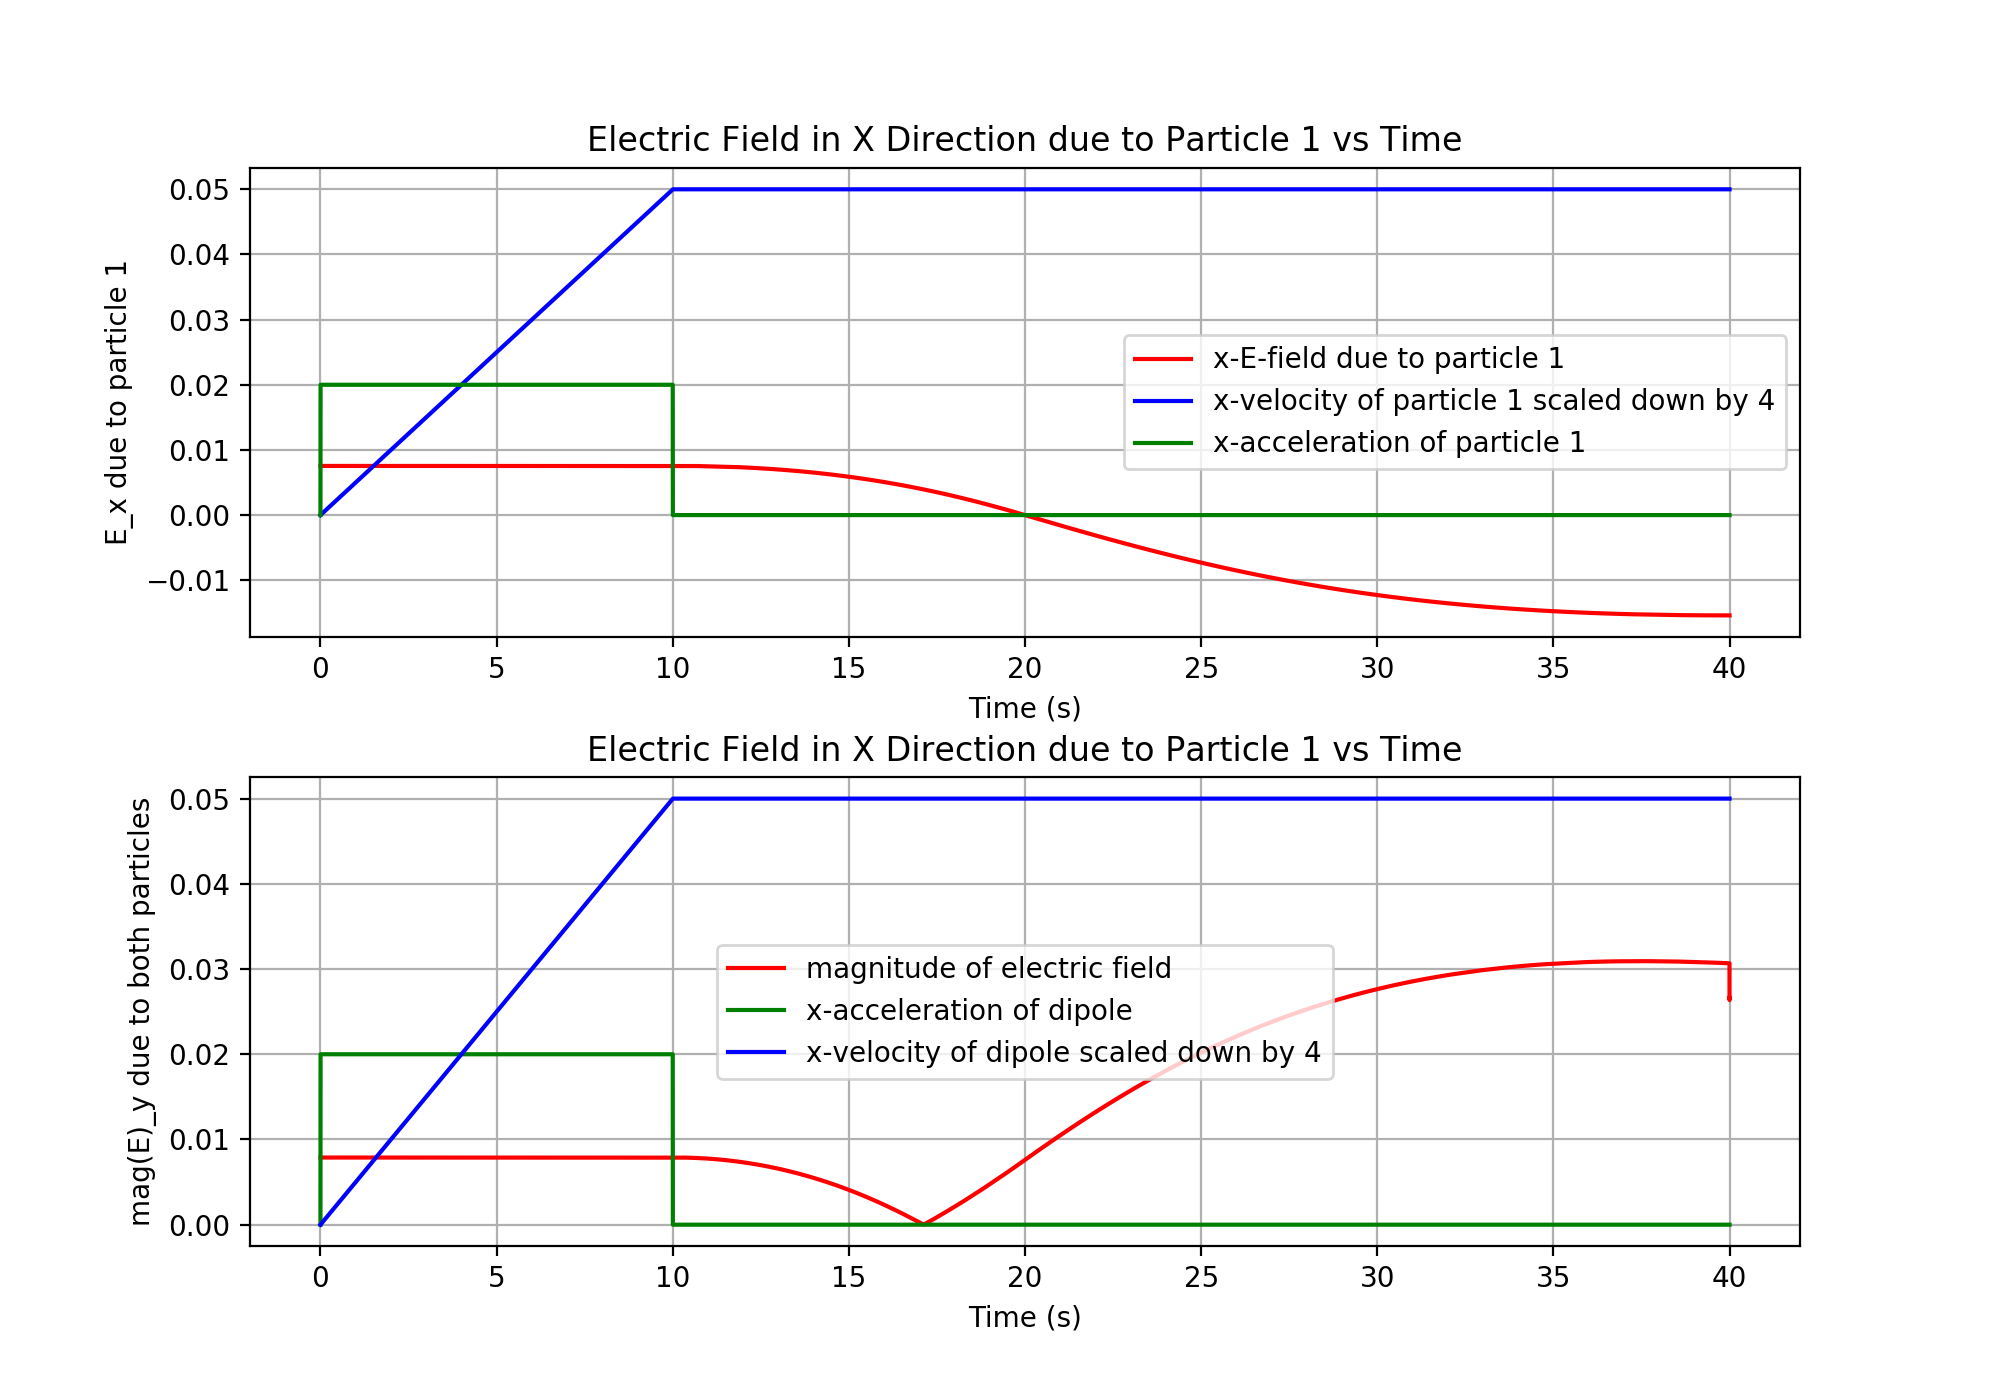

In [21]:
# This cell is for plotting data about the piecewise force

def magnitude(a1,a2):
    return np.sqrt(a1**2 + a2**2)


fig, (ax1,ax3) = plt.subplots(2, figsize=(10,7))
ax1.plot(timesteps, new_point.electric_field_1[:, 0], 'r-', label = 'x-E-field due to particle 1')
ax1.plot(timesteps, dipole_piecewise.vel_1[:, 0]/4, 'b-', label = 'x-velocity of particle 1 scaled down by 4')
ax1.plot(timesteps, dipole_piecewise.accel_1[:, 0], 'g-', label = 'x-acceleration of particle 1')
ax1.grid()
ax1.legend()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E_x due to particle 1")
ax1.legend()


ax3.plot(timesteps, magnitude(new_point.electric_field[:, 1],new_point.electric_field[:, 0]), 'r-', label = 'magnitude of electric field')
ax3.plot(timesteps, dipole_piecewise.accel_1[:, 0], 'g-', label = 'x-acceleration of dipole')
ax3.plot(timesteps, dipole_piecewise.vel_1[:, 0]/4, 'b-', label = 'x-velocity of dipole scaled down by 4')
ax3.legend()


ax3.set_xlabel("Time (s)")
ax3.set_ylabel("mag(E)_y due to both particles")

# ax1.grid()
ax3.grid()

ax1.title.set_text("Electric Field in X Direction due to Particle 1 vs Time")
ax3.title.set_text("Electric Field in X Direction due to Particle 1 vs Time")

fig.subplots_adjust(hspace=.3)

In [22]:
#Physics
# superposition
omega_1 = np.sqrt(3)
omega_2 = 2
E0_a = 0.02
E0_b = 0.03
phase_shift = 2*np.pi/3

# create a force that is the superposition of two different sinusoidal forces
superPos_force = sinusoidal_force(E0_a, omega_1, timesteps) + sinusoidal_force(E0_b, omega_2, timesteps, phase=phase_shift)

# apply superposition force to dipole
dipole_superPos = Dipole(timesteps = timesteps, distance =1,k = 1, external_force_arr=superPos_force)
dipole_superPos.calc_trajectory()

# calculate electric field evolution for superposition of electric fields
superPos_point = point_in_space(0.5, 3, 0, timesteps)
superPos_point.calculate_electric_field(dipole_superPos)

<IPython.core.display.Javascript object>


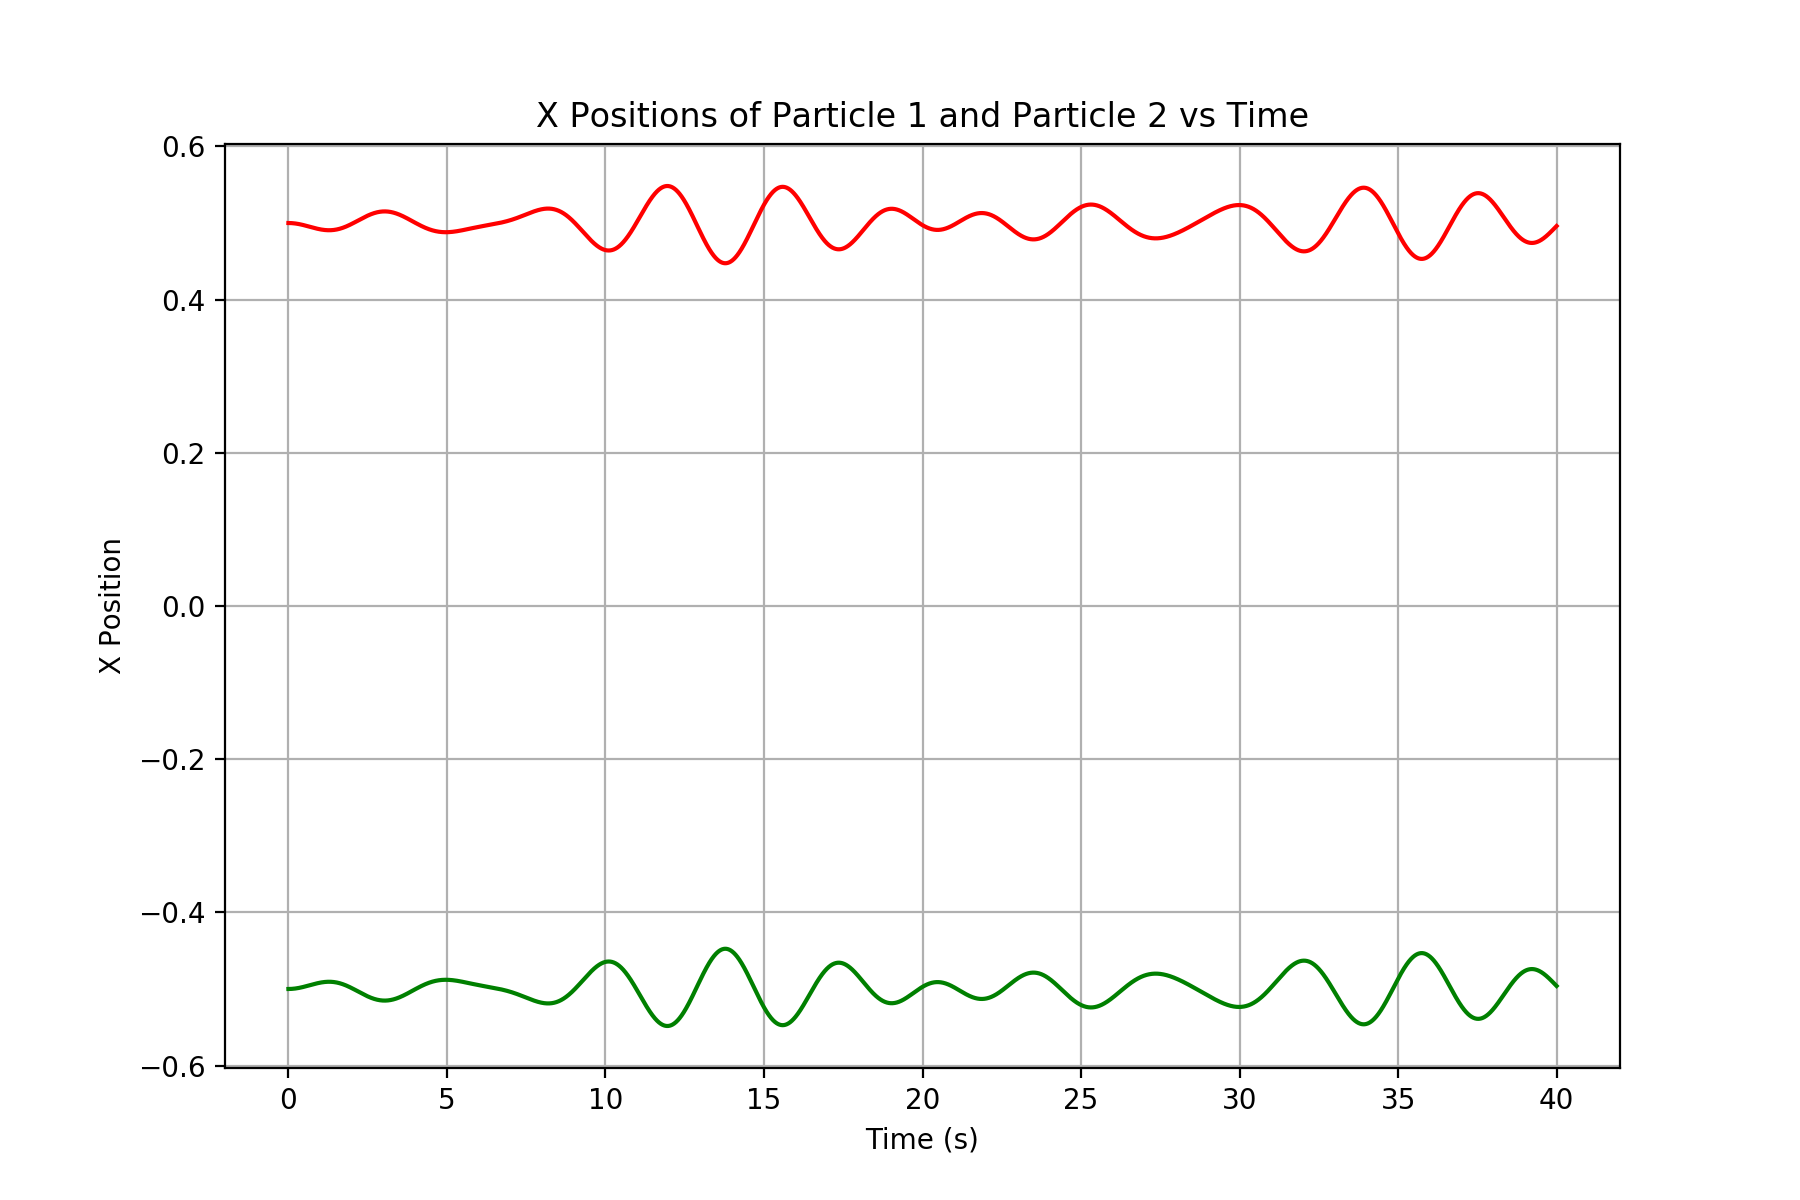

In [23]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole_superPos.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax1.plot(timesteps, dipole_superPos.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")


ax1.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")

<IPython.core.display.Javascript object>


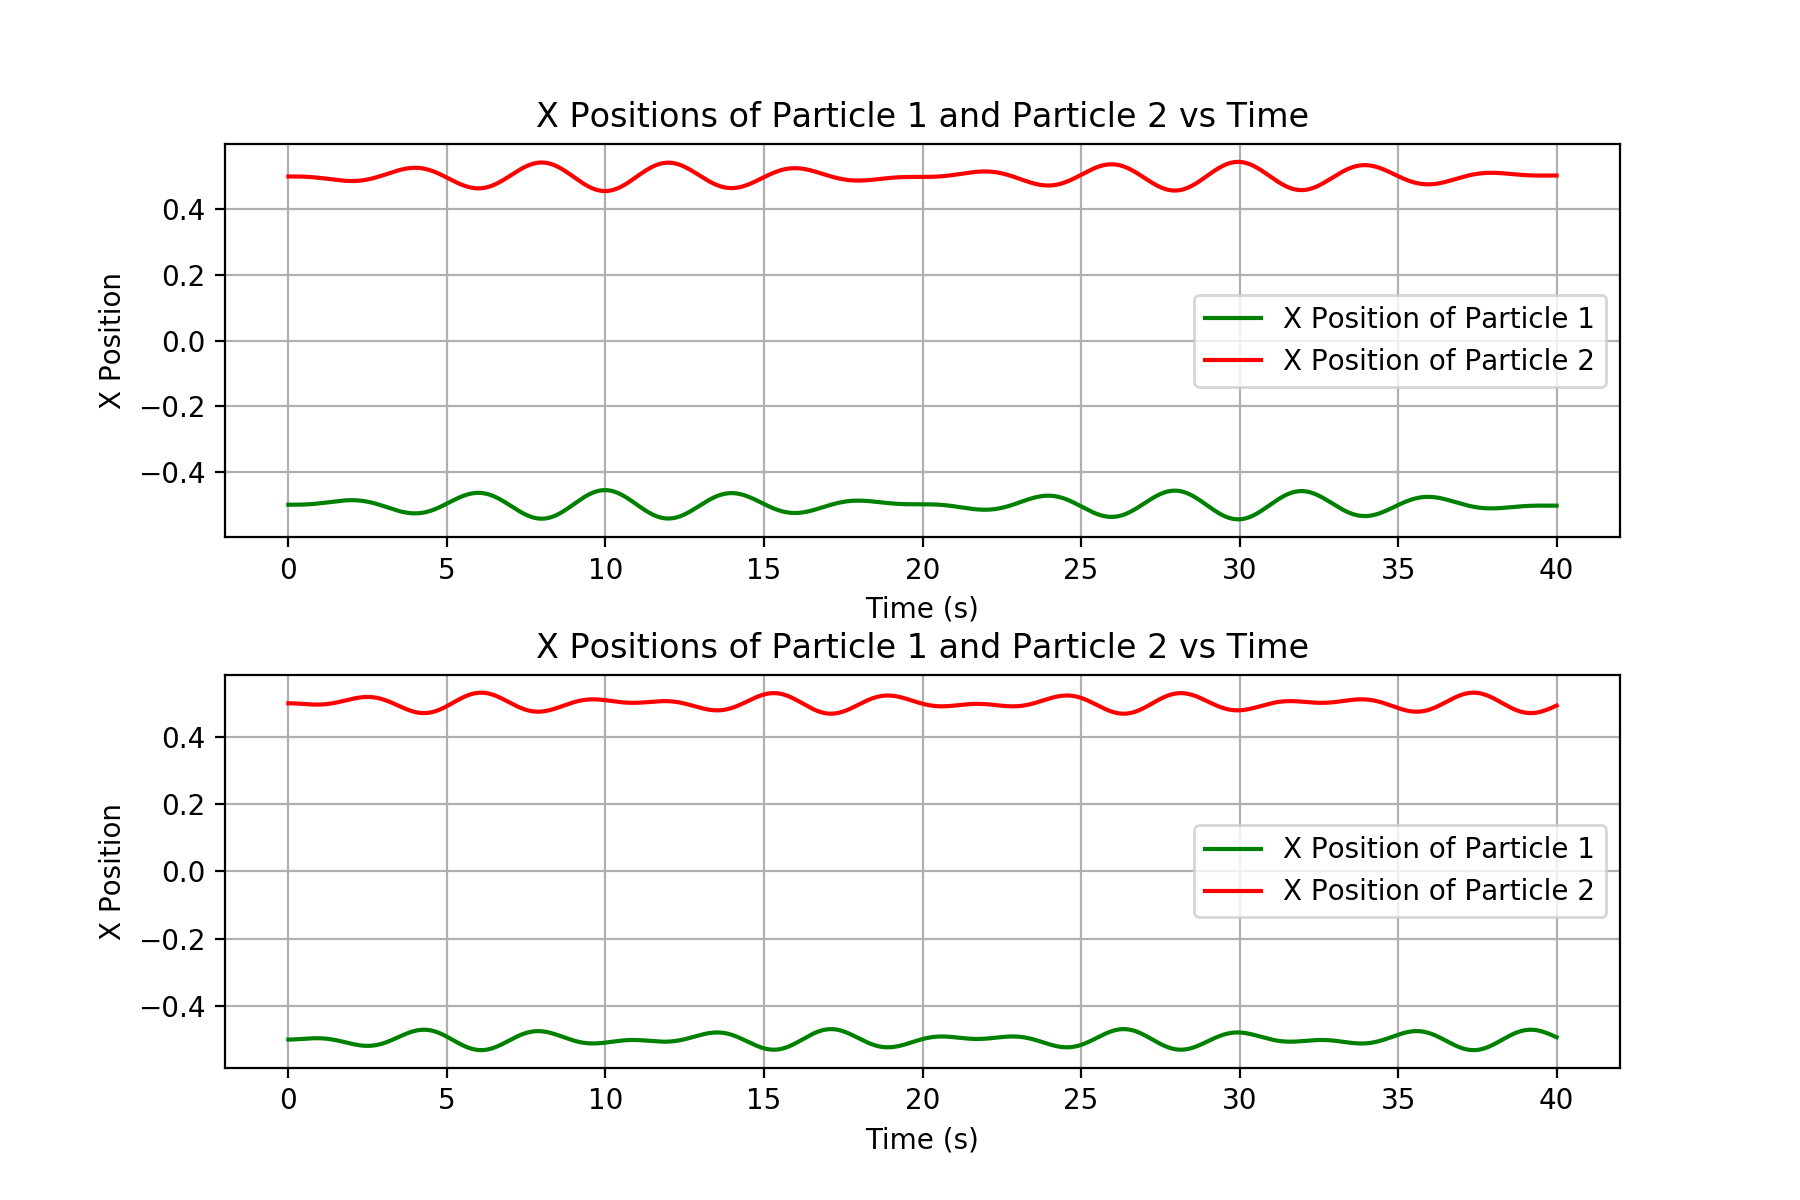

In [24]:
# calculate forces for the two sinusoidal forces earlier but separate this time
# additionally, create two different dipoles 
#Physics

superPos_1 = sinusoidal_force(E0_a, omega_1, timesteps)
dipole_one = Dipole(timesteps = timesteps, distance =1,k = 1, external_force_arr=superPos_1)
dipole_one.calc_trajectory()

superPos_2 = sinusoidal_force(E0_b, omega_2, timesteps, phase=phase_shift)
dipole_two = Dipole(timesteps = timesteps, distance =1,k = 1, external_force_arr=superPos_2)
dipole_two.calc_trajectory()

fig, (ax1,ax2) = plt.subplots(2, figsize=(9,6))

ax1.plot(timesteps, dipole_one.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax1.plot(timesteps, dipole_one.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax1.grid()
ax1.legend()
ax1.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")

ax2.plot(timesteps, dipole_two.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax2.plot(timesteps, dipole_two.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax2.grid()
ax2.legend()
ax2.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("X Position")

fig.subplots_adjust(hspace=.35)

<IPython.core.display.Javascript object>


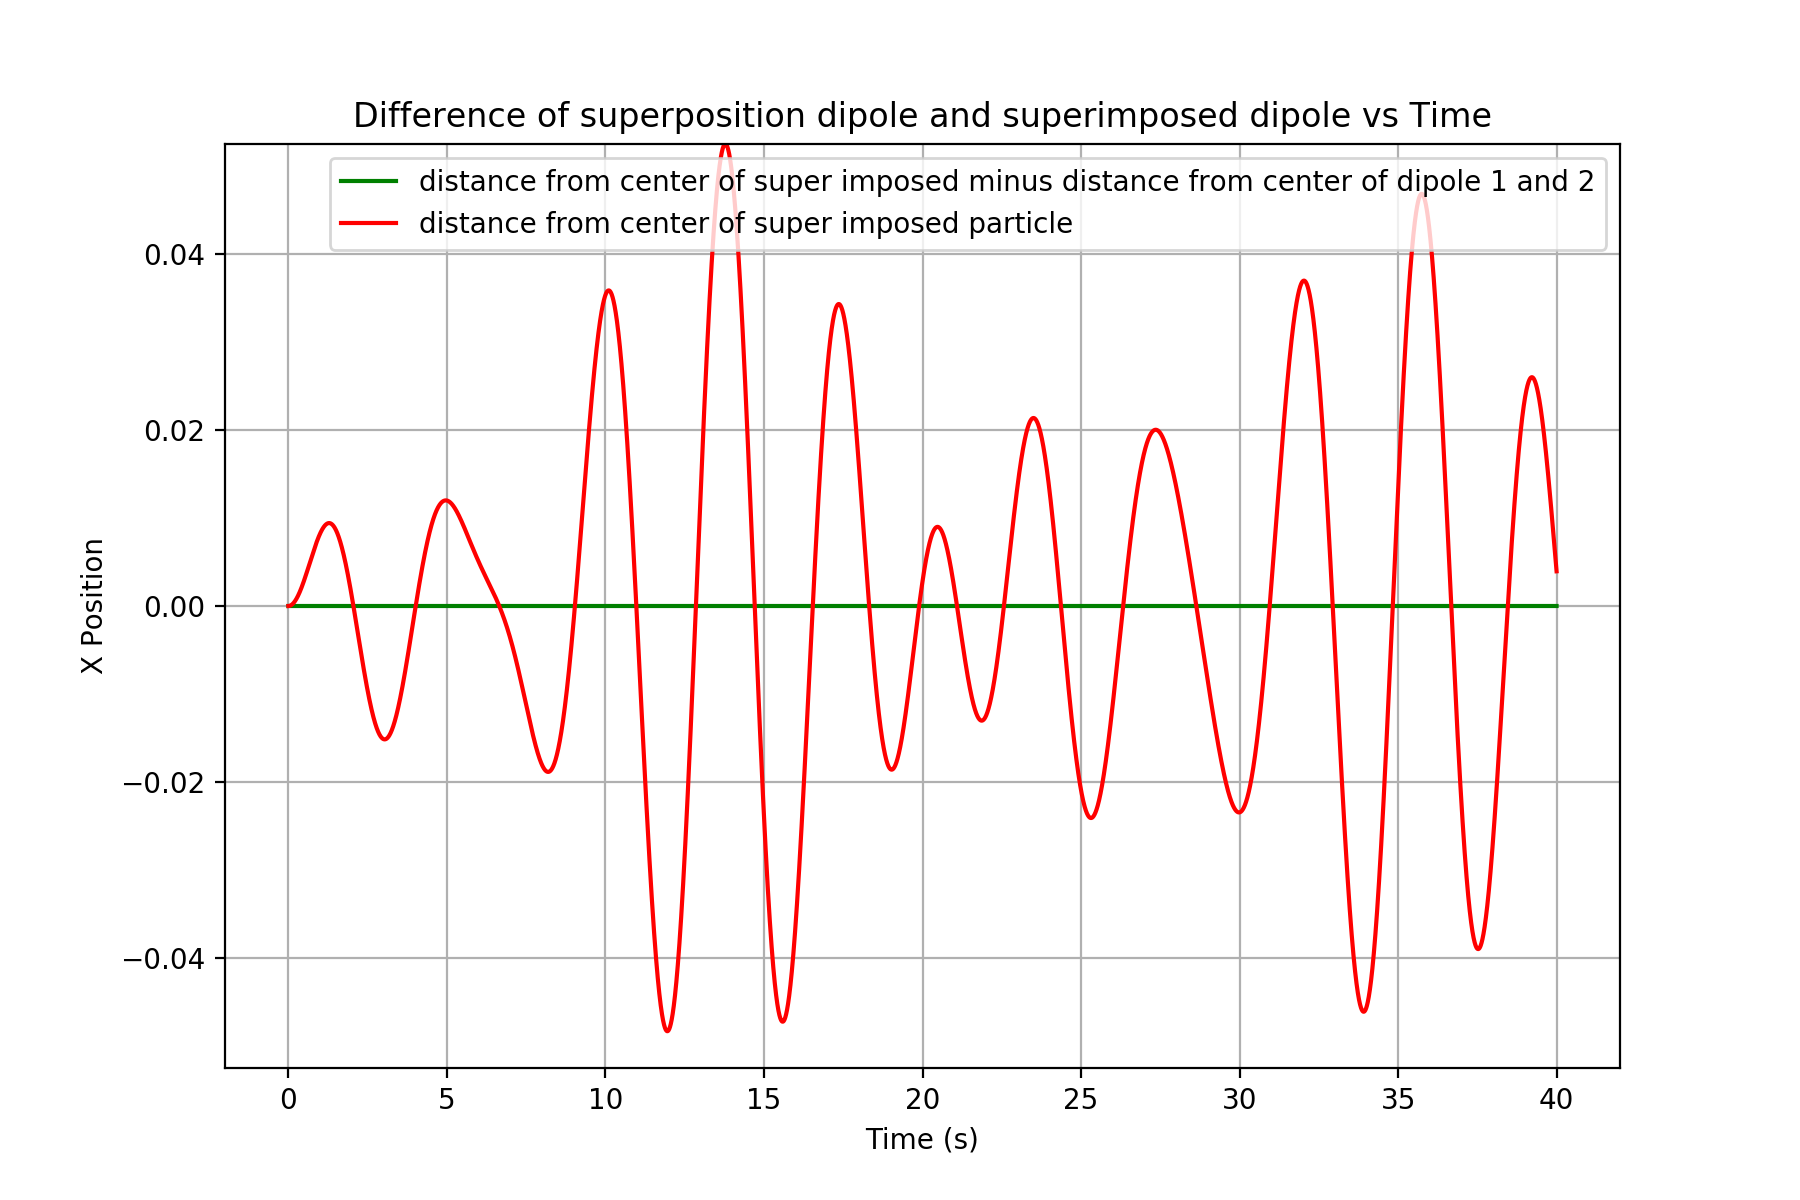

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))
ax1.set_xlim(-2, 42)

dipole_1_max = np.amax(np.abs(dipole_one.dist_center1[:, 0]))
dipole_2_max = np.amax(np.abs(dipole_two.dist_center1[:, 0]))
dipole_super_max = np.amax(np.abs(dipole_superPos.dist_center1[:, 0]))

plot_max = np.amax(np.array([dipole_1_max, dipole_2_max, dipole_super_max]))

ax1.set_ylim(-plot_max, plot_max)


difference = (dipole_one.dist_center1 + dipole_two.dist_center1) - dipole_superPos.dist_center1

ax1.plot(timesteps, difference[:,0], 'g-', label="distance from center of super imposed minus distance from center of dipole 1 and 2")
ax1.plot(timesteps, dipole_superPos.dist_center1[:, 0], 'r-', label="distance from center of super imposed particle")
ax1.grid()

ax1.title.set_text("Difference of superposition dipole and superimposed dipole vs Time")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")
ax1.legend()

plt.show()
#comfirms superposition

Citations:

Lewin, Walter, director. 8.03 - Lect 14 - Accelerated Charges, Poynting Vector, Power, Rayleigh Scattering. 8.03 - Lect 14 - Accelerated Charges, Poynting Vector, Power, Rayleigh Scattering, 11 Feb. 2015, www.youtube.com/watch?v=QpGBs307qYs.

OpenCourseWare, MIT, director. Accelerated Charges Radiating Electromagnetic Waves. Accelerated Charges Radiating Electromagnetic Waves, 24 Oct. 2013, www.youtube.com/watch?v=wF8vLZ9ceb0&amp;t=1195s.

Physics, Real, director. 9.1.2 Electric Dipole Radiation. 9.1.2 Electric Dipole Radiation, 28 June 2015, www.youtube.com/watch?v=MGCHznSfCnQ&amp;t=593s.